In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.visualization import *
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from util.plotting import *
from src.sampling.Sampling import sampling_sndl

### Load Erdos-Renyi

In [2]:
def ER(ntwk, save_path='data/ER_{ntwk}.txt'):
    save_path = save_path.format(ntwk=ntwk)
    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    n = len(G.nodes())
    p = nx.density(G)

    G_er = nx.erdos_renyi_graph(n=n,p=p)
    nx.write_edgelist(G_er, save_path, data=False)

In [ ]:
ER('Caltech36')

### Load Watts-Strogatz

In [3]:
def WS(ntwk, p=0.1, random_orientation=False, save_path='data/WS_{ntwk}.txt'):
    # Watts-Strogatz model with baseline graph G and edge rewiring probability p 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    # For each oriented edge, resample the head node uniformly at random with probability p, independently. 
    # Do nothing for that edge with probability 1-p. 
    
    save_path = save_path.format(ntwk=ntwk)

    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    # Give random orientation by crea
    if random_orientation: 
        G1 = random_orientation(G)
    else: #G is already a digraph 
        G1 = G

    nodes = list(G1.nodes())
    G_ws = nx.Graph()
    
    for e in G1.edges():
        U = np.random.rand()
        if U < p: 
            i = np.random.choice(np.arange(len(nodes)))
            v = nodes[i]
            G_ws.add_edge(e[0],v)
        else: 
            G_ws.add_edge(e[0],e[1])

    nx.write_edgelist(G_ws, save_path, data=False)

In [ ]:
WS('Caltech36')

### Load Barabasi-Albert (preferential attachment)

In [4]:
def BA(ntwk, m0=1, m=1, n=100, alpha=1, save_path='data/BA_{ntwk}.txt'):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability 
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen 
    # randomly with probability proportional to the degree^alpha
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    if G0 is not None: 
        G_ba = G0
    else: 
        G_ba = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G_ba.add_edge(1,1)
        
    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution 
            degrees = np.asarray([G_ba.degree(n)**(alpha) for n in G_ba.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G_ba.nodes(), p=deg_dist)
            G_ba.add_edge(s,v)

    nx.write_edgelist(G_ba, save_path, data=False)

In [ ]:
BA('Caltech36')

### Load Confinguration Model

In [5]:
def CM(ntwk, save_path='data/CM_{ntwk}.txt'):
    # Configuration model with degree sequence d = [d1, ... , dn] (a list or array)
    # di \ge 0 and sum to even 
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    degrees = [G0.degree(v) for v in G0.nodes()]

    d = list(degrees)
    stubs_list = []
    for i in np.arange(len(d)):
        for j in np.arange(d[i]):
            stubs_list.append([i,j])

    G_cm = nx.MultiGraph()
    while len(stubs_list)>0:
        ss = np.random.choice(np.asarray(len(stubs_list)), 2, replace=False)
        s1 = ss[0]
        s2 = ss[1]
        half_edge1 = stubs_list[s1]
        half_edge2 = stubs_list[s2]
        G_cm.add_edge(half_edge1[0], half_edge2[0])
        stubs_list.remove(half_edge1)
        if s1 != s2:
            stubs_list.remove(half_edge2)
                    
    nx.write_edgelist(G_cm, save_path, data=False)

In [ ]:
CM('Caltech36')

# Synthetic Baseline

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/CM_Caltech36_WS_Caltech36_BA_Caltech36_bs500_k20_xi2_nc25_iter250_bi0_avg.pkl
Calling `sndl_equalEdge` and computing dictionary for CM_Caltech36
Calling `sndl_equalEdge` and computing dictionary for WS_Caltech36
Calling `sndl_equalEdge` and computing dictionary for BA_Caltech36


100%|██████████| 250/250 [00:33<00:00,  7.55it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\CM_Caltech36_WS_Caltech36_BA_Caltech36_etc_bs500_k20_nc25_iter250_bi0_avg.png


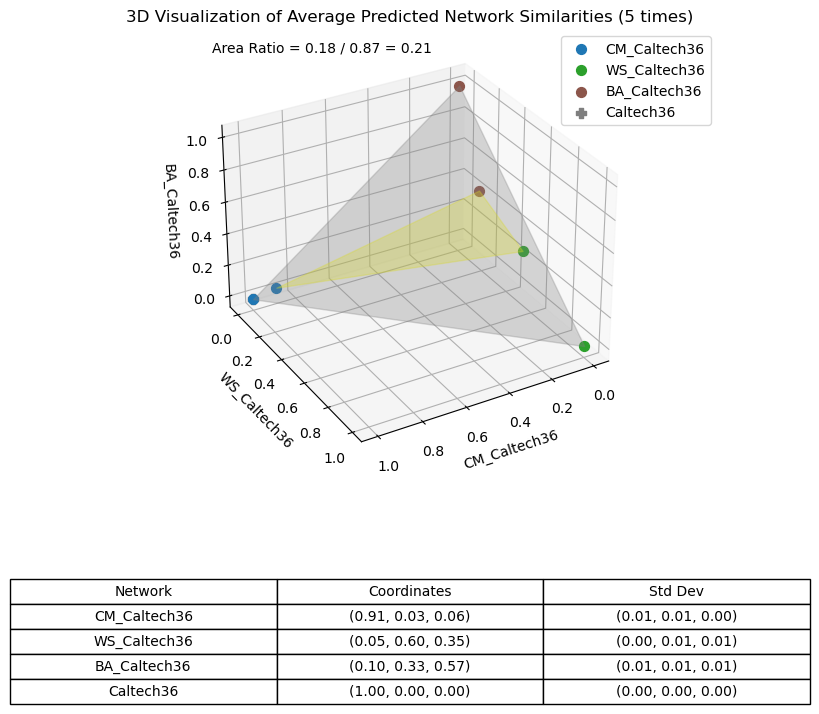

In [2]:
ntwk_list = ['CM_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'Caltech36']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=20, n_components=25, iterations=250, 
                   xi=2, baseline_i=0, skip_folded_hom=False,
                   average=True, times=5)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/ER_Caltech36_WS_Caltech36_BA_Caltech36_bs500_k20_xi2_nc25_iter250_bi0_avg.pkl
Calling `sndl_equalEdge` and computing dictionary for ER_Caltech36
Calling `sndl_equalEdge` and computing dictionary for WS_Caltech36
Calling `sndl_equalEdge` and computing dictionary for BA_Caltech36


100%|██████████| 250/250 [00:24<00:00, 10.23it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\ER_Caltech36_WS_Caltech36_BA_Caltech36_etc_bs500_k20_nc25_iter250_bi0_avg.png


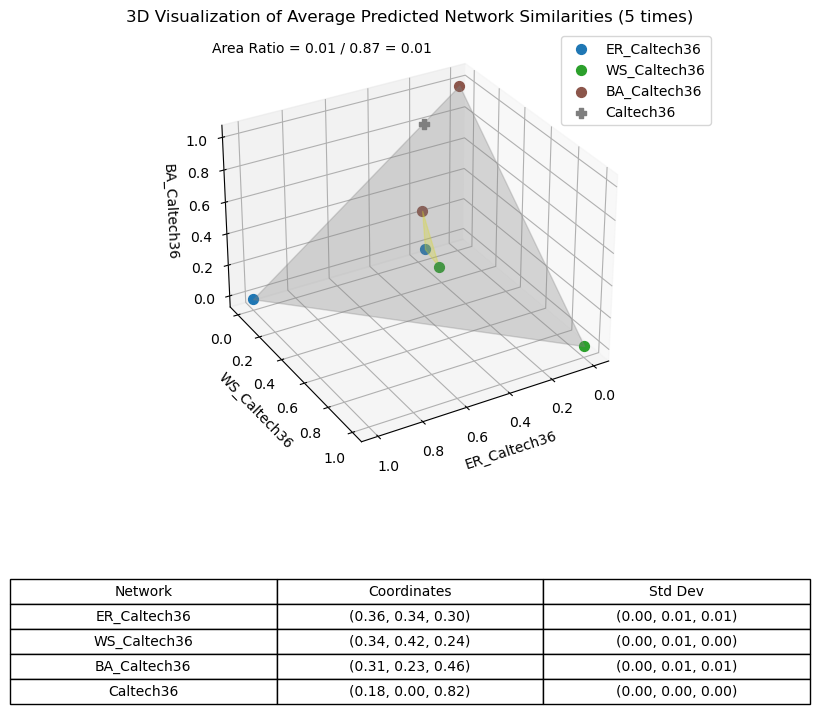

In [3]:
ntwk_list = ['ER_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'Caltech36']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=20, n_components=25, iterations=250, 
                   xi=2, baseline_i=0, skip_folded_hom=False,
                   average=True, times=5)

# Biological Networks

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/bio-human_bio-plant_bio-yeast_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for bio-human
Calling `sndl_equalEdge` and computing dictionary for bio-plant
Calling `sndl_equalEdge` and computing dictionary for bio-yeast


100%|██████████| 250/250 [00:28<00:00,  8.79it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\bio-human_bio-plant_bio-yeast_etc_bs500_k60_nc25_iter250_bi0_single.png


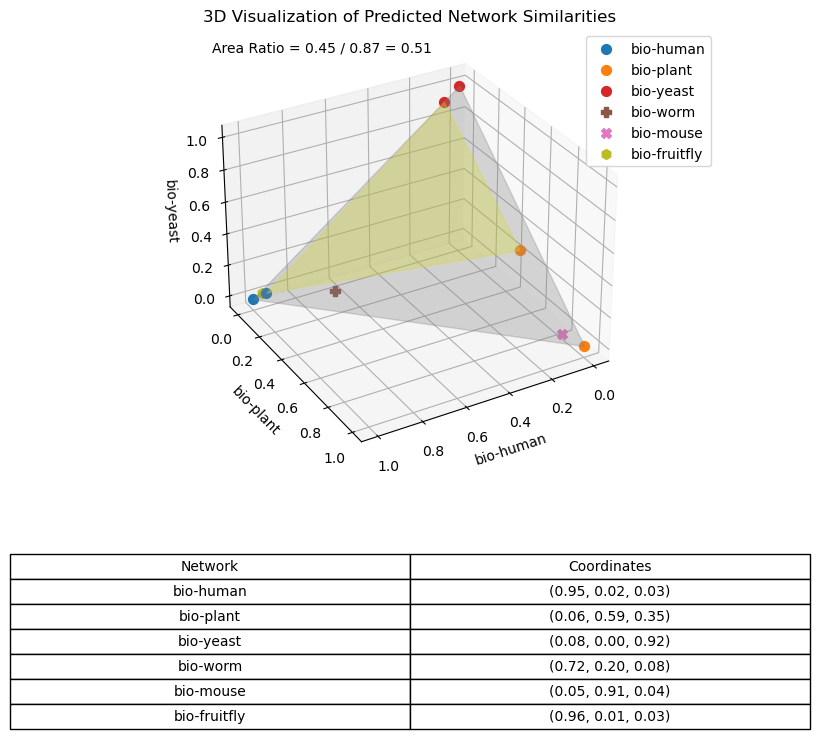

In [4]:
ntwk_list = ['bio-human', 'bio-plant', 'bio-yeast', 'bio-worm', 'bio-mouse', 'bio-fruitfly']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/bio-human_bio-plant_bio-yeast_bs500_k25_xi2_nc25_iter250_bi0_avg.pkl
Calling `sndl_equalEdge` and computing dictionary for bio-human
Calling `sndl_equalEdge` and computing dictionary for bio-plant
Calling `sndl_equalEdge` and computing dictionary for bio-yeast


100%|██████████| 250/250 [00:18<00:00, 13.53it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\bio-human_bio-plant_bio-yeast_etc_bs500_k25_nc25_iter250_bi0_avg.png


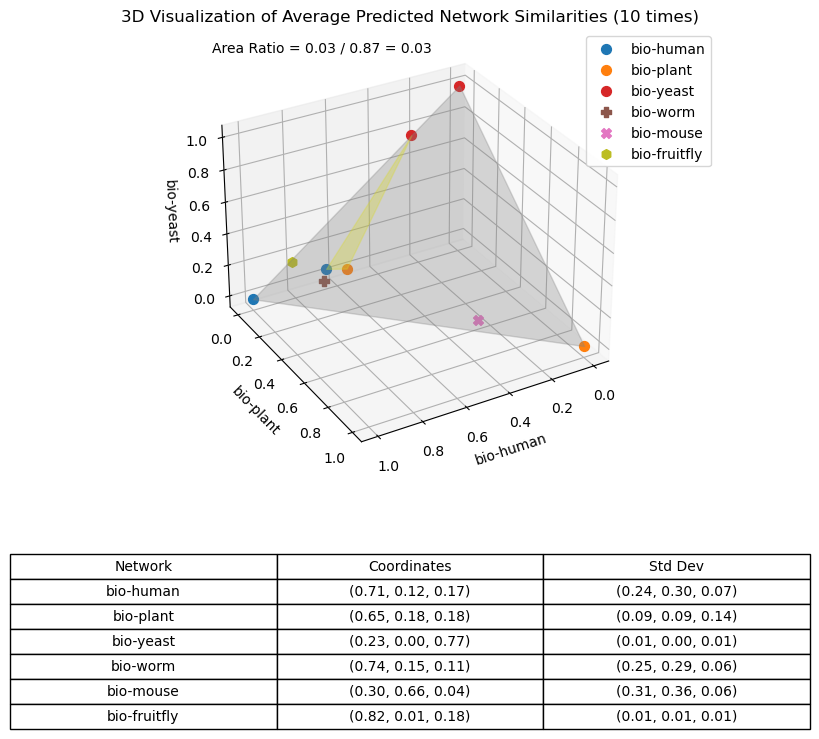

In [5]:
ntwk_list = ['bio-human', 'bio-plant', 'bio-yeast', 'bio-worm', 'bio-mouse', 'bio-fruitfly']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=25, n_components=25, iterations=250, 
                   xi=2, baseline_i=0, skip_folded_hom=False,
                   average=True, times=10)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/bio-yeast_bio-worm_bio-fruitfly_bs500_k25_xi5_nc25_iter250_bi0_avg.pkl
Calling `sndl_equalEdge` and computing dictionary for bio-yeast
Calling `sndl_equalEdge` and computing dictionary for bio-worm
Calling `sndl_equalEdge` and computing dictionary for bio-fruitfly


100%|██████████| 250/250 [00:24<00:00, 10.15it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\bio-yeast_bio-worm_bio-fruitfly_etc_bs500_k25_nc25_iter250_bi0_avg.png


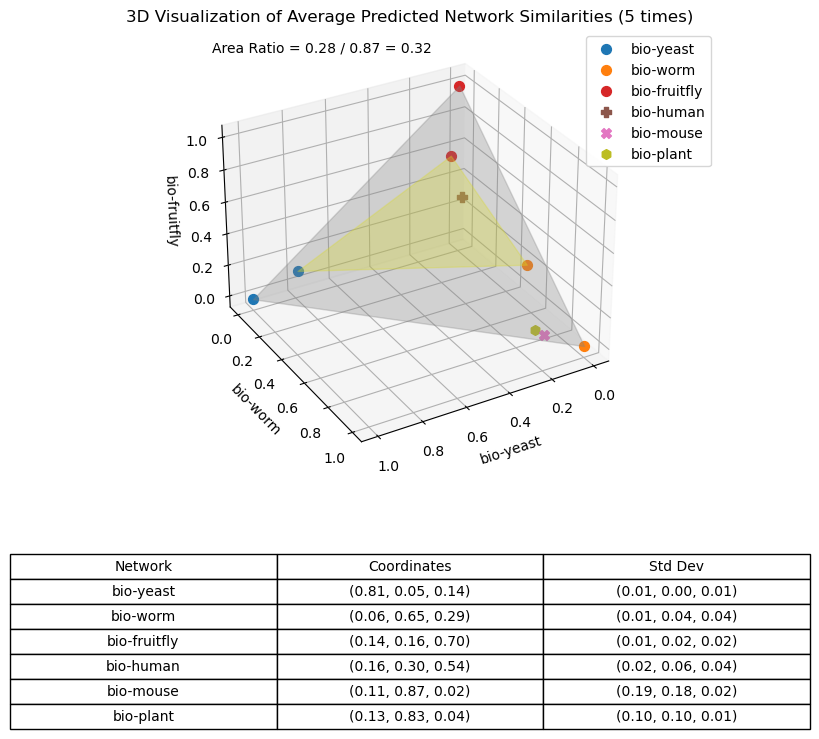

In [6]:
ntwk_list = ['bio-yeast', 'bio-worm', 'bio-fruitfly', 'bio-human', 'bio-mouse', 'bio-plant']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=25, n_components=25, iterations=250, 
                   xi=5, baseline_i=0, skip_folded_hom=False,
                   average=True, times=5)